# Notebook for doing Mollweide projection of neutrino/wimp recoil skymaps
* Plots both 6 GeV WIMP + 8B neutrinos on top of each other with a diverging colormap
* basemap actually still uses depracated functions, and may warn about that 
* it also throws a bunch of warnings when you do the contour plot rather than the pcolormesh (comment either one out to see how they look)
* potentially there are a still a few minus signs flying about here, but the plots look how I expect them to

To do: try and improve the plot a bit

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see

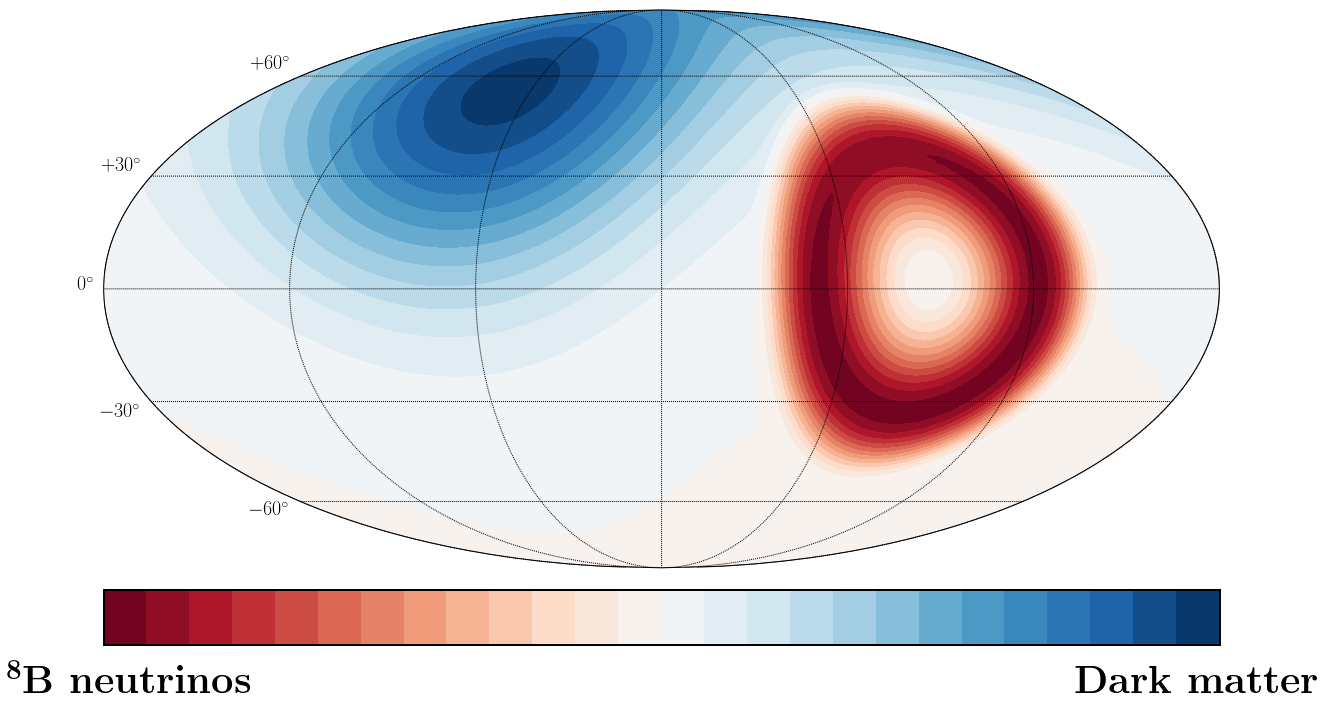

In [48]:
from mpl_toolkits.basemap import Basemap
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from LabFuncs import *
from Params import *
from WIMPFuncs import *
from NeutrinoFuncs import *
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)


n = 200
ph = linspace(0, 2*pi, n)
th = linspace(0,pi, n/2)
PH,TH = meshgrid(ph,th)
X = cos(PH)*sin(TH)
Y = -sin(PH)*sin(TH)
Z = cos(TH)
ii = 0
q = zeros(shape=(n*n/2,3))
for i in range(0,n/2):
    for j in range(0,n):
        q[ii,:] = array([X[i,j],Y[i,j],Z[i,j]])
        ii = ii+1

t = array([JulianDay(9,12,2018,18.0)])
DM = WIMP(6.0,1.0e-45)
HaloModel = SHM
Loc = Boulby
Nuc = Xe131
NuBG = GetNuFluxes(0.0,Nuc)
E_nu_all = NuBG.Energy
Flux_all = NuBG.Flux
n_nu = NuBG.NumberOfNeutrinos 
Errs = NuBG.Uncertainty


ne = 10
E_r_vals = linspace(1.0,2.0,ne)
dR_wimp = zeros(shape=(1,n*n/2))
dR_nu = zeros(shape=(1,n*n/2))

for i in range(0,ne):
    E = E_r_vals[i]*q
    dR_wimp = dR_wimp + WIMPRate_Direction(E,t,DM,HaloModel,Nuc,Loc)  
    dR_nu = dR_nu + dRdEdO_nu(E,t,E_nu_all[:,5],Flux_all[:,5],Nuc,Loc)

dR_wimp = dR_wimp/max(max(dR_wimp))
dR_nu = dR_nu/max(max(dR_nu[:]))
dR = (dR_wimp-dR_nu)

dR_map = zeros(shape=(n/2,n))
ii = 0
for i in range(0,n/2):
    for j in range(0,n):
        dR_map[i,j] = dR[0,ii]
        ii = ii+1

m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)
for i in range(0,4): # loop is to cure some rendering issues with matplotlib
    # use either contourf or pcolormesh depending on preference:
    m.contourf(PH*180/pi, TH*180/pi-90.0, dR_map,30, cmap=plt.cm.RdBu,latlon=True)
    #m.pcolormesh(PH*180/pi, TH*180/pi-90.0, dR_map, cmap=plt.cm.RdBu,latlon=True)

m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=20) # draw parallels
m.drawmeridians(arange(0.,420.,60.),color='k',fontsize=20) # draw meridians

cbar = plt.colorbar(orientation='horizontal',pad=0.02,ticks=[-0.99, 1.0],extend='both')
cbar.ax.set_xticklabels([r'$^{\bf 8}${\bf B neutrinos}',r'{\bf Dark matter}'])
cbar.ax.tick_params(labelsize=40,length=0,pad=20)
plt.show()

fig.savefig('../plots/WIMP-Mollweide.pdf',bbox_inches='tight')